## Final Project Submission

Please fill out:
* Student name: Eric Cusick
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

## OBTAIN


> Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

> Loading in the dataset for the project and make sure it loaded correctly

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## SCRUBBING

### Previewing the Data

 >Checking Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Both date and sqft_basement are object

>Checking out 'sqft_basement' column because it is listed as an object

In [5]:
df.sqft_basement.unique()[:5]

array(['0.0', '400.0', '910.0', '1530.0', '?'], dtype=object)

>Checking out the 'price' column

In [6]:
df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [7]:
# It's a float dtype but ended up checking to make sure there was no weird 
# symbols

>Checking out the waterfront due to missing rows

In [8]:
df.waterfront.unique()

array([nan,  0.,  1.])

>Checking to see if there is any extraneous values

In [9]:
for col in df:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

In [10]:
# Columns that have extraneous values: sqft_basement

>Checking for missing values

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
# Waterfront, yr_renovated, and view are missing some values

# May be a good idea to fill in the view with the mode or remove the rows
# altogether

# Waterfront nan should be mark with a 0 under the assumption the house is not
# on a waterfront

# yr_renovated needs to be transform into a numeric boolean value

>Using .describe() to take a look at some of the min and max values in each columns

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
# 'sqft_basement' and 'date' columns are missing due to being an object
# we would want to have the sqft_basement to be an integer/float
# the 'date' can be left alone as it is a categorical data

### Cleaning/Fixing Data

>Converting the 'sqft_basement' dtype from an object to a number

In [15]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [16]:
# Needs to fix it into a mean!!!!!!!
df.sqft_basement = df.sqft_basement.replace('?', np.nan)

In [17]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6       NaN
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [18]:
df.sqft_basement = df.sqft_basement.astype('float64')
# not a perament change yet

In [19]:
df.sqft_basement = df.sqft_basement.fillna(np.nanmedian(df.sqft_basement))

In [20]:
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6       0.0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: float64

>Taking care of missing values in the dataset

>Replace all missing value in 'waterfront' to a 0 assuming that the house is not on a waterfront

In [21]:
df.waterfront = df.waterfront.fillna(0)

In [22]:
df.waterfront.unique()

array([0., 1.])

>Filling in the missing values for 'view' column with a 0

In [23]:
df.view = df.view.fillna(0)

In [24]:
df.view.unique()

array([0., 3., 4., 2., 1.])

>Filling in the missing values for 'yr_renovated' with a 0 assuming that they have not been renovated

In [25]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [26]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [27]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
# All missing values has been replaced

>Checking the .describe() for changes

In [29]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

>Converting the date column to a datetime format to create a new column for months

In [31]:
df.date = pd.to_datetime(df.date)

In [32]:
df['month'] = df.date.dt.month

>Checking to see if the new columns 'month' were added to the dataset

In [33]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


>Dropping the 'date' column, we're only interested in the months

In [34]:
df = df.drop('date', axis=1)

>Converting the datatype in 'yr_renovated' to a boolean value

In [35]:
df['yr_renovated'] = df['yr_renovated'].astype('bool')

In [36]:
df['yr_renovated'].value_counts()

False    20853
True       744
Name: yr_renovated, dtype: int64

In [37]:
df['yr_renovated'] = df['yr_renovated'].astype('int')

In [38]:
df['yr_renovated'].value_counts()

0    20853
1      744
Name: yr_renovated, dtype: int64

### One-Hot Encoding Categorical Columns

In [39]:
# Using columns 'condition', 'grade', 'zipcode' to check out the number of 
# unique values in each columns to see what is worth OHE

df[['condition', 'grade', 'zipcode']].nunique()

condition     5
grade        11
zipcode      70
dtype: int64

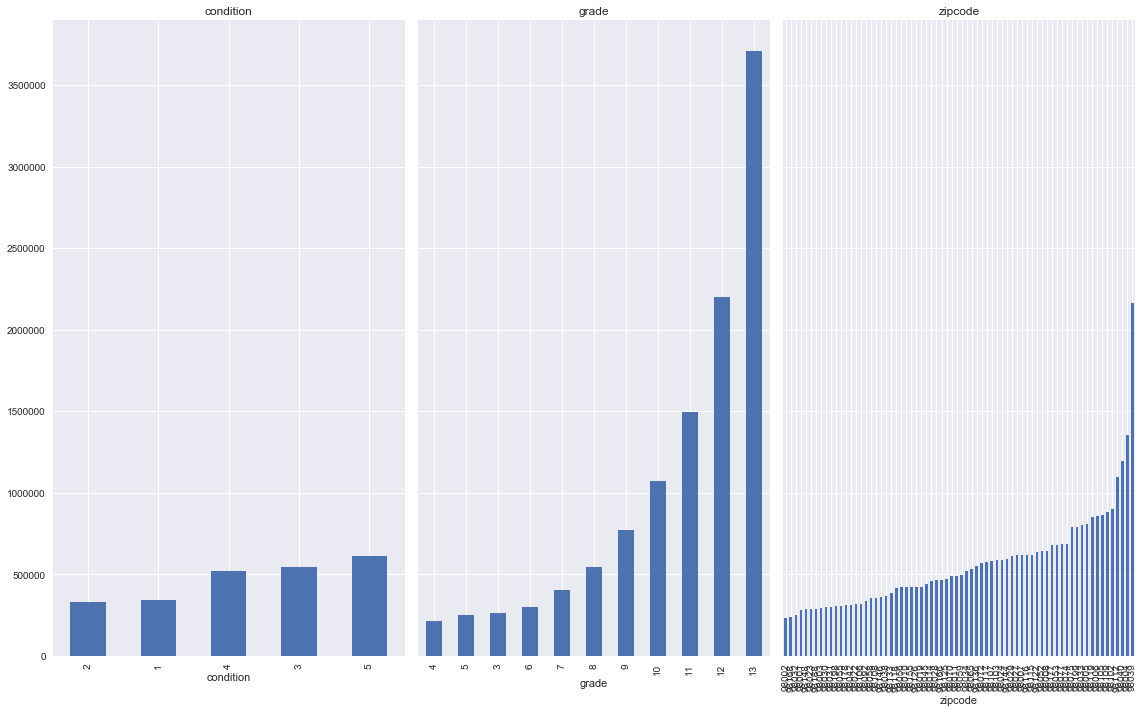

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [41]:
df_=df.copy()

In [42]:
df = pd.get_dummies(df_, columns = feats, drop_first=True)
df
# df_preprocessed = df.drop(feats, axis=1)
# df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
# df_preprocessed.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1180,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,1530,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,2310,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,1020,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,1600,...,0,0,0,0,0,0,0,0,0,0


### Checking for Multicollinearity 

>Investigating whether multicollinearity exists in 'sqft' columns

In [43]:
sqft_col = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
            'sqft_living15', 'sqft_lot15']
for col in sqft_col:
    t_f = col in df.columns
    print(f"{col}={t_f}")

sqft_living=True
sqft_lot=True
sqft_above=True
sqft_basement=True
sqft_living15=True
sqft_lot15=True


In [44]:
df[sqft_col].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
sqft_living,1.000000,0.173453,0.876448,0.428660,0.756402,0.184342
sqft_lot,0.173453,1.000000,0.184139,0.015031,0.144763,0.718204
sqft_above,0.876448,0.184139,1.000000,-0.051175,0.731767,0.195077
sqft_basement,0.428660,0.015031,-0.051175,1.000000,0.199288,0.015885
sqft_living15,0.756402,0.144763,0.731767,0.199288,1.000000,0.183515
sqft_lot15,0.184342,0.718204,0.195077,0.015885,0.183515,1.000000


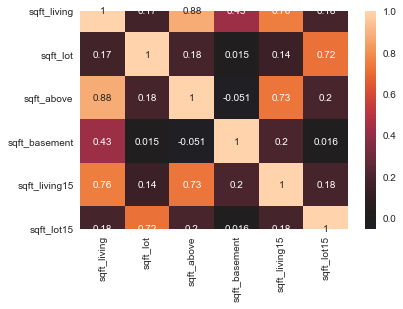

In [45]:
sns.heatmap(df[sqft_col].corr(), center=0, annot=True);

In [46]:
# There seems to be a significant correlation between:
# 'sqft_living' and 'sqft_above'
# 'sqft_living' and 'sqft_living15' 
# 'sqft_lot' and 'sqft_lot15'
# 'sqft_above' and 'sqft_living15'

# I would eliminate the columns 'sqft_above', 'sqft_living15', 'sqft_lot15'

>Removing Columns from the Dataset

In [47]:
df = df.drop(['view', 'lat', 'long', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

In [48]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1955,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,1933,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,...,0,0,0,0,0,0,0,0,0,0


### Removing Outliers

In [87]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

## EXPLORING

### Quick Overview

>Histogram over each columns

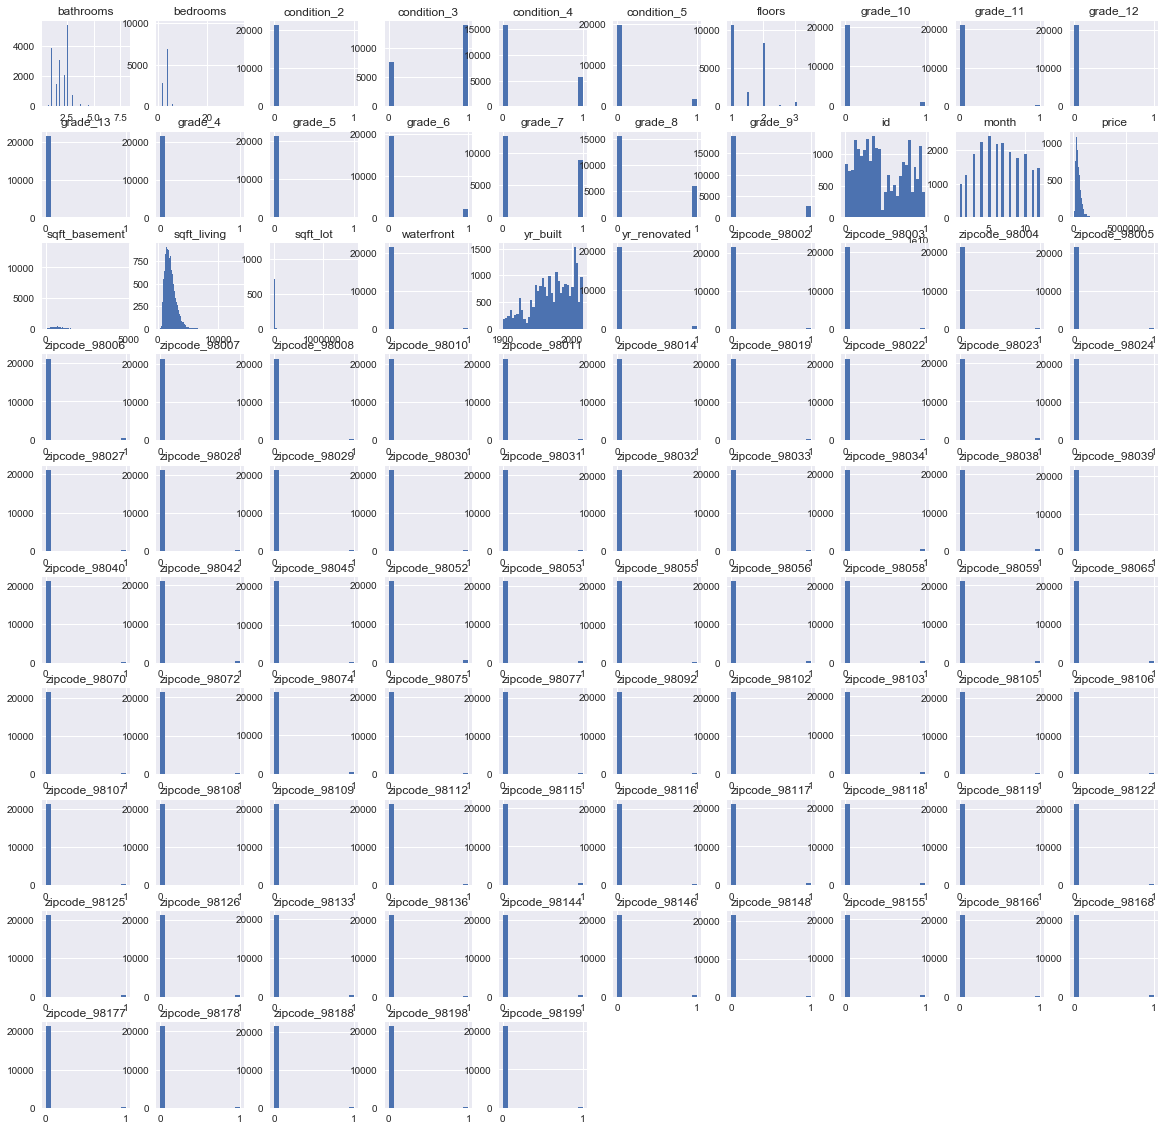

In [49]:
df.hist(bins = 'auto', figsize = (20,20));

### Exploring For Linearity


>Here we're just taking a peek at potentially important
correlation using 'price' based off of assumption and observation

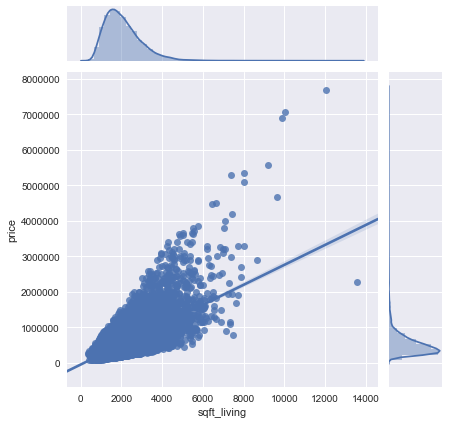

In [50]:
sns.jointplot('sqft_living', 'price', data=df, kind='reg'); 

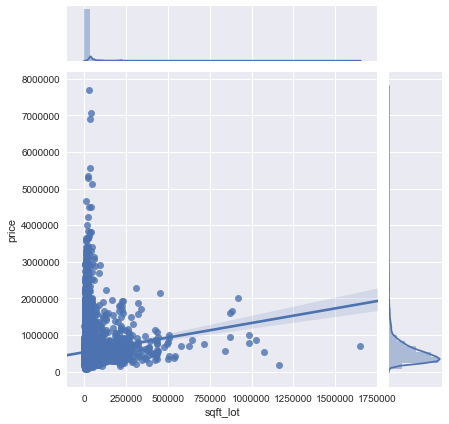

In [51]:
sns.jointplot('sqft_lot', 'price', data=df, kind='reg');

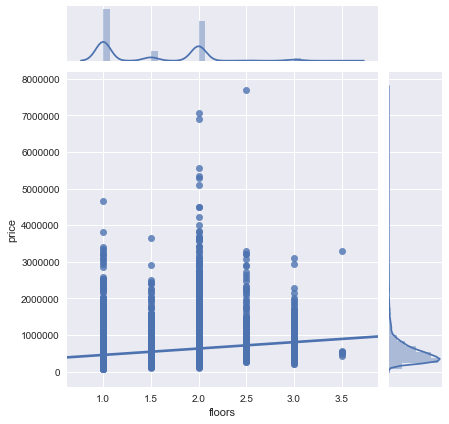

In [52]:
sns.jointplot('floors', 'price', data=df, kind='reg');

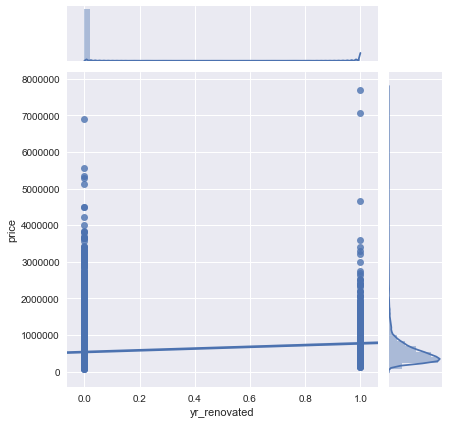

In [53]:
sns.jointplot('yr_renovated', 'price', data=df, kind='reg');

>I've found the website containing information retaining to the grade and condition criteria set by King County https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

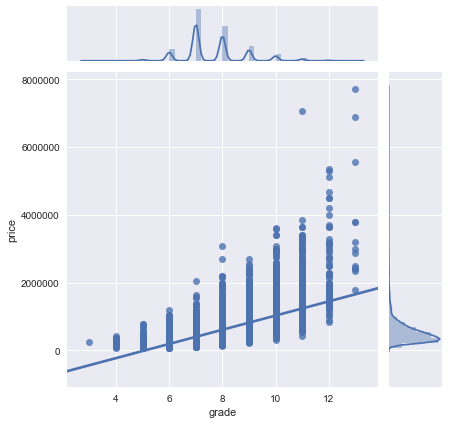

In [54]:
sns.jointplot('grade', 'price', data=df_, kind='reg');

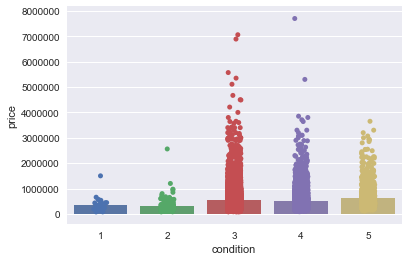

In [55]:
sns.stripplot('condition', 'price', data=df_);
sns.barplot('condition', 'price', data=df_);

1         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
3         AxesSubplot(0.1,0.414706;0.363636x0.220588)
4    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
5             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

<Figure size 1080x1080 with 0 Axes>

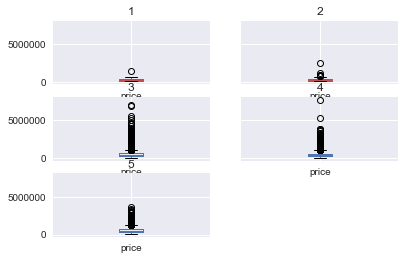

In [56]:
plt.figure(figsize = (15, 15))
df_.groupby('condition').boxplot(column = 'price')

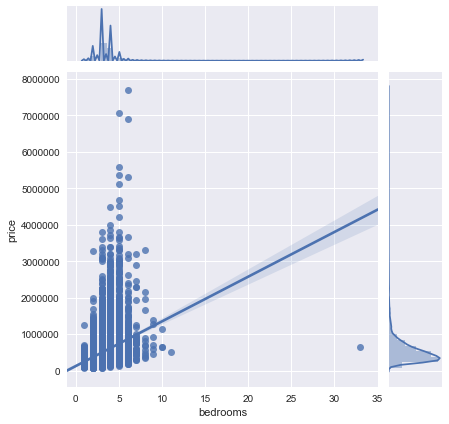

In [57]:
sns.jointplot('bedrooms', 'price', data=df, kind='reg');

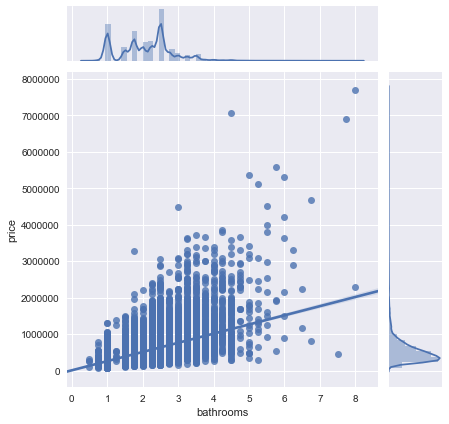

In [58]:
sns.jointplot('bathrooms', 'price', data=df, kind='reg');

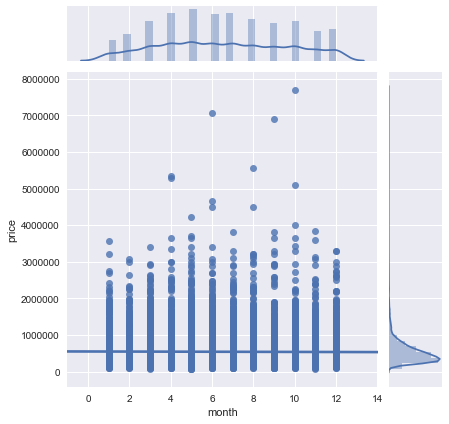

In [59]:
sns.jointplot('month', 'price', data=df, kind='reg');

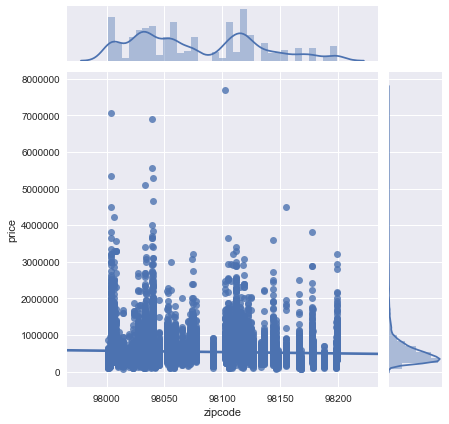

In [60]:
sns.jointplot('zipcode', 'price', data=df_, kind='reg');

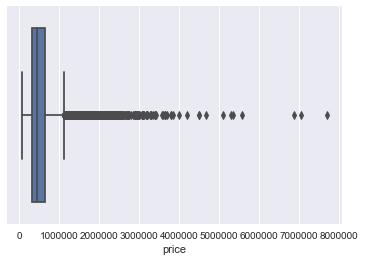

In [61]:
sns.boxplot(df['price'])

98001        AxesSubplot(0.1,0.829245;0.0851064x0.0707547)
98002    AxesSubplot(0.202128,0.829245;0.0851064x0.0707...
98003    AxesSubplot(0.304255,0.829245;0.0851064x0.0707...
98004    AxesSubplot(0.406383,0.829245;0.0851064x0.0707...
98005    AxesSubplot(0.508511,0.829245;0.0851064x0.0707...
                               ...                        
98177       AxesSubplot(0.202128,0.15;0.0851064x0.0707547)
98178       AxesSubplot(0.304255,0.15;0.0851064x0.0707547)
98188       AxesSubplot(0.406383,0.15;0.0851064x0.0707547)
98198       AxesSubplot(0.508511,0.15;0.0851064x0.0707547)
98199       AxesSubplot(0.610638,0.15;0.0851064x0.0707547)
Length: 70, dtype: object

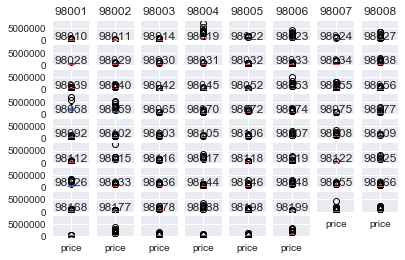

In [62]:
df_.groupby('zipcode').boxplot(column = 'price')

## MODEL

### Setting Up the Data for Modeling

Importing packages for modeling

In [63]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

>Haven't remove outliers yet

In [64]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1955,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,1933,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Checking to see if there is any spacing, symbols, etc. in the column's name
list(df.columns)

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'month',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipco

In [66]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [67]:
train, test = train_test_split(df)

In [68]:
print(len(train), len(test))
train.head()

16197 5400


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
5446,7237501190,1780000.0,4,3.25,4890,13402,2.0,0.0,0.0,2004,...,0,0,0,0,0,0,0,0,0,0
20586,7853361370,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,2012,...,0,0,0,0,0,0,0,0,0,0
8086,3900500110,627000.0,3,2.00,2310,10525,2.0,0.0,0.0,1965,...,0,0,0,0,0,0,0,0,0,0
13200,7465900205,675000.0,4,3.00,2780,5000,1.5,0.0,1070.0,1919,...,0,0,0,0,0,0,0,0,0,0
14538,7525050150,475000.0,3,2.25,1580,12177,1.0,0.0,380.0,1981,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     801.5
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:29:59   Log-Likelihood:            -2.1645e+05
No. Observations:               16197   AIC:                         4.331e+05
Df Residuals:                   16102   BIC:                         4.338e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.949e+05   2.11e+05      4.242      0.000    4.81e+05    1.31e+06
id             1.771e-07   4.38e-07      0.404      0.686   -6.82e-07    1.04e-06
bedrooms      -1.553e+04   1709.857     -9.081      0.000   -1.89e+04   -1.22e+04
bathrooms      2.481e+04   2917.642      8.503      0.000    1.91e+04    3.05e+04
sqft_living     173.8965      3.250     53.506      0.000     167.526     180.267
sqft_lot          0.1809      0.032      5.580      0.000       0.117       0.244
floors        -2.554e+04   3518.133     -7.260      0.000   -3.24e+04   -1.86e+04
waterfront     8.184e+05   1.55e+04     52.765      0.000    7.88e+05    8.49e+05
sqft_basement   -32.4745      3.983     -8.154      0.000     -40.281     -24.668
yr_built       -477.2680     72.736     -6.562      0.000    -619.840    -334.696
yr_renovated   5.072e+04   7064.412      7.179      0.000    3.69e+04    6.46e+04
month         -2981.6451    390.200     -7.641      0.000   -3746.480   -2216.810
condition_2    1.211e+05   3.64e+04      3.323      0.001    4.97e+04    1.93e+05
condition_3     1.36e+05    3.4e+04      3.998      0.000    6.93e+04    2.03e+05
condition_4    1.597e+05    3.4e+04      4.694      0.000     9.3e+04    2.26e+05
condition_5    2.033e+05   3.42e+04      5.938      0.000    1.36e+05     2.7e+05
grade_4       -4.929e+04   1.58e+05     -0.311      0.756    -3.6e+05    2.61e+05
grade_5       -1.103e+05   1.55e+05     -0.710      0.478   -4.15e+05    1.94e+05
grade_6       -1.102e+05   1.55e+05     -0.710      0.477   -4.14e+05    1.94e+05
grade_7       -1.036e+05   1.55e+05     -0.668      0.504   -4.07e+05       2e+05
grade_8       -7.024e+04   1.55e+05     -0.453      0.651   -3.74e+05    2.34e+05
grade_9        1.501e+04   1.55e+05      0.097      0.923   -2.89e+05    3.19e+05
grade_10       1.488e+05   1.55e+05      0.958      0.338   -1.56e+05    4.53e+05
grade_11       3.447e+05   1.56e+05      2.215      0.027    3.97e+04     6.5e+05
grade_12       8.511e+05   1.57e+05      5.431      0.000    5.44e+05    1.16e+06
grade_13       1.628e+06   1.62e+05     10.036      0.000    1.31e+06    1.95e+06
zipcode_98002   -81.4807   1.57e+04     -0.005      0.996   -3.08e+04    3.07e+04
zipcode_98003 -5606.9708   1.43e+04     -0.393      0.694   -3.36e+04    2.24e+04
zipcode_98004  7.835e+05   1.41e+04     55.682      0.000    7.56e+05    8.11e+05
zipcode_98005  2.884e+05    1.7e+04     16.965      0.000    2.55e+05    3.22e+05
zipcode_98006  2.687e+05   1.25e+04     21.418      0.000    2.44e+05    2.93e+05
zipcode_98007  2.472e+05   1.81e+04     13.624      0.000    2.12e+05    2.83e+05
zipcode_98008  2.685e+05   1.47e+04     18.267      0.000     2.4e+05    2.97e+05
zipcode_98010  4.389e+04   2.06e+04      2.135      0.033    3602.828    8.42e+04
zipcode_98011  1.359e+05   1.61e+04      8.457   

>Removing uninfluential features

In [70]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

95 76
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.949e+05,2.11e+05,4.242,0.000,4.81e+05,1.31e+06
id,1.771e-07,4.38e-07,0.404,0.686,-6.82e-07,1.04e-06
bedrooms,-1.553e+04,1709.857,-9.081,0.000,-1.89e+04,-1.22e+04
bathrooms,2.481e+04,2917.642,8.503,0.000,1.91e+04,3.05e+04
sqft_living,173.8965,3.250,53.506,0.000,167.526,180.267


>Taking a look at the OLS to see the changes and if the R-squared value is still at a healthy number

In [71]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     907.7
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:29:59   Log-Likelihood:            -2.1704e+05
No. Observations:               16197   AIC:                         4.342e+05
Df Residuals:                   16120   BIC:                         4.348e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.536e+05   1.42e+05      1.082      0.279   -1.25e+05    4.32e+05
bedrooms      -2.661e+04   1732.403    -15.358      0.000      -3e+04   -2.32e+04
bathrooms       2.43e+04   3005.731      8.084      0.000    1.84e+04    3.02e+04
sqft_living     232.8189      2.797     83.242      0.000     227.337     238.301
sqft_lot          0.2170      0.033      6.622      0.000       0.153       0.281
floors          -2.6e+04   3616.983     -7.189      0.000   -3.31e+04   -1.89e+04
waterfront     8.405e+05   1.58e+04     53.036      0.000    8.09e+05    8.72e+05
sqft_basement   -62.6611      4.012    -15.617      0.000     -70.526     -54.796
yr_built       -179.5309     71.433     -2.513      0.012    -319.547     -39.515
yr_renovated   4.819e+04   7301.664      6.599      0.000    3.39e+04    6.25e+04
month         -3138.6682    404.193     -7.765      0.000   -3930.931   -2346.405
condition_2    1.323e+05   3.77e+04      3.506      0.000    5.83e+04    2.06e+05
condition_3    1.479e+05   3.51e+04      4.207      0.000     7.9e+04    2.17e+05
condition_4    1.672e+05   3.51e+04      4.757      0.000    9.83e+04    2.36e+05
condition_5    2.131e+05   3.54e+04      6.026      0.000    1.44e+05    2.82e+05
grade_11       2.643e+05   1.02e+04     25.833      0.000    2.44e+05    2.84e+05
grade_12       7.186e+05   2.11e+04     34.057      0.000    6.77e+05     7.6e+05
grade_13       1.422e+06   4.75e+04     29.918      0.000    1.33e+06    1.51e+06
zipcode_98004  8.154e+05   1.13e+04     71.932      0.000    7.93e+05    8.38e+05
zipcode_98005   3.16e+05    1.5e+04     21.056      0.000    2.87e+05    3.45e+05
zipcode_98006  3.047e+05   9177.151     33.203      0.000    2.87e+05    3.23e+05
zipcode_98007  2.708e+05   1.64e+04     16.489      0.000    2.39e+05    3.03e+05
zipcode_98008   2.79e+05   1.22e+04     22.899      0.000    2.55e+05    3.03e+05
zipcode_98010  4.081e+04   1.92e+04      2.121      0.034    3101.570    7.85e+04
zipcode_98011  1.321e+05    1.4e+04      9.453      0.000    1.05e+05    1.59e+05
zipcode_98014  7.231e+04   1.76e+04      4.100      0.000    3.77e+04    1.07e+05
zipcode_98019  6.436e+04   1.41e+04      4.580      0.000    3.68e+04    9.19e+04
zipcode_98023 -2.798e+04   8969.469     -3.119      0.002   -4.56e+04   -1.04e+04
zipcode_98024  1.427e+05   2.13e+04      6.692      0.000    1.01e+05    1.84e+05
zipcode_98027  1.699e+05   9664.389     17.578      0.000    1.51e+05    1.89e+05
zipcode_98028  1.286e+05   1.12e+04     11.487      0.000    1.07e+05    1.51e+05
zipcode_98029  2.293e+05    1.1e+04     20.939      0.000    2.08e+05    2.51e+05
zipcode_98033  3.839e+05   9577.684     40.083      0.000    3.65e+05    4.03e+05
zipcode_98034  2.088e+05   8500.290     24.564      0.000    1.92e+05    2.25e+05
zipcode_98038  1.648e+04   8428.951      1.955   

>Running through again to see if there is any other uninfluential features

In [73]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

77 74
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.536e+05,1.42e+05,1.082,0.279,-1.25e+05,4.32e+05
bedrooms,-2.661e+04,1732.403,-15.358,0.000,-3e+04,-2.32e+04
bathrooms,2.43e+04,3005.731,8.084,0.000,1.84e+04,3.02e+04
sqft_living,232.8189,2.797,83.242,0.000,227.337,238.301
sqft_lot,0.2170,0.033,6.622,0.000,0.153,0.281


>The R-squared seems to be unchanged

In [74]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     931.9
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:31:00   Log-Likelihood:            -2.1704e+05
No. Observations:               16197   AIC:                         4.342e+05
Df Residuals:                   16122   BIC:                         4.348e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.537e+05   1.42e+05      1.084      0.278   -1.24e+05    4.32e+05
bedrooms      -2.668e+04   1732.317    -15.403      0.000   -3.01e+04   -2.33e+04
bathrooms      2.446e+04   3005.454      8.138      0.000    1.86e+04    3.04e+04
sqft_living     232.9085      2.797     83.284      0.000     227.427     238.390
sqft_lot          0.2176      0.033      6.640      0.000       0.153       0.282
floors         -2.59e+04   3616.500     -7.162      0.000    -3.3e+04   -1.88e+04
waterfront     8.397e+05   1.58e+04     52.992      0.000    8.09e+05    8.71e+05
sqft_basement   -62.8809      4.012    -15.674      0.000     -70.744     -55.017
yr_built       -177.9388     71.336     -2.494      0.013    -317.765     -38.113
yr_renovated   4.814e+04   7302.222      6.592      0.000    3.38e+04    6.24e+04
month         -3129.6501    404.230     -7.742      0.000   -3921.985   -2337.315
condition_2    1.323e+05   3.77e+04      3.508      0.000    5.84e+04    2.06e+05
condition_3    1.478e+05   3.52e+04      4.205      0.000    7.89e+04    2.17e+05
condition_4    1.667e+05   3.52e+04      4.743      0.000    9.78e+04    2.36e+05
condition_5    2.127e+05   3.54e+04      6.014      0.000    1.43e+05    2.82e+05
grade_11       2.639e+05   1.02e+04     25.799      0.000    2.44e+05    2.84e+05
grade_12       7.181e+05   2.11e+04     34.032      0.000    6.77e+05    7.59e+05
grade_13       1.421e+06   4.75e+04     29.898      0.000    1.33e+06    1.51e+06
zipcode_98004  8.119e+05   1.12e+04     72.259      0.000     7.9e+05    8.34e+05
zipcode_98005  3.126e+05   1.49e+04     20.927      0.000    2.83e+05    3.42e+05
zipcode_98006  3.013e+05   9054.740     33.273      0.000    2.84e+05    3.19e+05
zipcode_98007  2.674e+05   1.64e+04     16.346      0.000    2.35e+05    2.99e+05
zipcode_98008  2.757e+05   1.21e+04     22.780      0.000    2.52e+05    2.99e+05
zipcode_98010   3.73e+04   1.92e+04      1.945      0.052    -296.491    7.49e+04
zipcode_98011  1.285e+05   1.39e+04      9.252      0.000    1.01e+05    1.56e+05
zipcode_98014  6.863e+04   1.76e+04      3.908      0.000    3.42e+04    1.03e+05
zipcode_98019  6.059e+04    1.4e+04      4.341      0.000    3.32e+04    8.79e+04
zipcode_98023 -3.144e+04   8844.874     -3.554      0.000   -4.88e+04   -1.41e+04
zipcode_98024  1.391e+05   2.13e+04      6.541      0.000    9.74e+04    1.81e+05
zipcode_98027  1.663e+05   9534.559     17.440      0.000    1.48e+05    1.85e+05
zipcode_98028  1.251e+05   1.11e+04     11.277      0.000    1.03e+05    1.47e+05
zipcode_98029  2.255e+05   1.08e+04     20.836      0.000    2.04e+05    2.47e+05
zipcode_98033  3.804e+05   9455.858     40.227      0.000    3.62e+05    3.99e+05
zipcode_98034  2.053e+05   8368.408     24.537      0.000    1.89e+05    2.22e+05
zipcode_98039  1.255e+06   2.93e+04     42.767   

### Looking into Multicollinearity

In [75]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 23.610156051628636),
 ('bathrooms', 25.726609593607837),
 ('sqft_living', 25.47789740728716),
 ('sqft_lot', 1.3147601786178686),
 ('floors', 18.7508299667576),
 ('waterfront', 1.0528467283535563),
 ('sqft_basement', 2.7938223004702176),
 ('yr_built', 760.8199941739076),
 ('yr_renovated', 1.0819876261934196),
 ('month', 5.482138474780637),
 ('condition_2', 6.60455486586335),
 ('condition_3', 471.18214088258304),
 ('condition_4', 188.71148462279734),
 ('condition_5', 56.82054333910747),
 ('grade_11', 1.229070084290791),
 ('grade_12', 1.1176160844372547),
 ('grade_13', 1.0499837039336235),
 ('zipcode_98004', 1.125353411536707),
 ('zipcode_98005', 1.0616145632159568),
 ('zipcode_98006', 1.198193901174568),
 ('zipcode_98007', 1.0450996451193018),
 ('zipcode_98008', 1.094143207257931),
 ('zipcode_98010', 1.034730101883482),
 ('zipcode_98011', 1.0611392733789062),
 ('zipcode_98014', 1.060462876385372),
 ('zipcode_98019', 1.0625991081223474),
 ('zipcode_98023', 1.1511714522190808

In [76]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x, vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

74 64


In [85]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     470.2
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:33:05   Log-Likelihood:            -2.2199e+05
No. Observations:               16197   AIC:                         4.441e+05
Df Residuals:                   16132   BIC:                         4.446e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.631e+05   4427.792     59.427      0.000    2.54e+05    2.72e+05
sqft_lot          0.6863      0.044     15.678      0.000       0.601       0.772
waterfront     9.357e+05   2.14e+04     43.775      0.000    8.94e+05    9.78e+05
sqft_basement   139.1591      4.084     34.076      0.000     131.154     147.164
yr_renovated   7.866e+04   9432.822      8.339      0.000    6.02e+04    9.71e+04
grade_11       6.691e+05    1.3e+04     51.627      0.000    6.44e+05    6.94e+05
grade_12       1.292e+06   2.77e+04     46.665      0.000    1.24e+06    1.35e+06
grade_13        2.34e+06   6.34e+04     36.912      0.000    2.22e+06    2.46e+06
zipcode_98004  9.326e+05   1.51e+04     61.600      0.000    9.03e+05    9.62e+05
zipcode_98005  3.981e+05   2.02e+04     19.722      0.000    3.59e+05    4.38e+05
zipcode_98006  3.951e+05   1.22e+04     32.345      0.000    3.71e+05    4.19e+05
zipcode_98007  3.029e+05   2.22e+04     13.673      0.000    2.59e+05    3.46e+05
zipcode_98008  2.754e+05   1.64e+04     16.819      0.000    2.43e+05    3.08e+05
zipcode_98010  8.072e+04    2.6e+04      3.105      0.002    2.98e+04    1.32e+05
zipcode_98011  1.726e+05   1.88e+04      9.179      0.000    1.36e+05    2.09e+05
zipcode_98014  7.461e+04   2.38e+04      3.135      0.002     2.8e+04    1.21e+05
zipcode_98019  1.066e+05   1.89e+04      5.645      0.000    6.96e+04    1.44e+05
zipcode_98023 -3.535e+04    1.2e+04     -2.950      0.003   -5.88e+04   -1.19e+04
zipcode_98024  1.673e+05   2.88e+04      5.802      0.000    1.11e+05    2.24e+05
zipcode_98027  2.309e+05   1.29e+04     17.910      0.000    2.06e+05    2.56e+05
zipcode_98028  1.406e+05    1.5e+04      9.351      0.000    1.11e+05     1.7e+05
zipcode_98029  3.056e+05   1.46e+04     20.978      0.000    2.77e+05    3.34e+05
zipcode_98033  4.464e+05   1.28e+04     34.884      0.000    4.21e+05    4.71e+05
zipcode_98034  1.856e+05   1.13e+04     16.376      0.000    1.63e+05    2.08e+05
zipcode_98039  1.443e+06   3.97e+04     36.340      0.000    1.36e+06    1.52e+06
zipcode_98040  7.017e+05    1.6e+04     43.845      0.000     6.7e+05    7.33e+05
zipcode_98045  1.103e+05   1.76e+04      6.283      0.000    7.59e+04    1.45e+05
zipcode_98052  3.101e+05   1.12e+04     27.714      0.000    2.88e+05    3.32e+05
zipcode_98053  3.357e+05    1.3e+04     25.773      0.000     3.1e+05    3.61e+05
zipcode_98055  7099.6982   1.59e+04      0.446      0.656   -2.41e+04    3.83e+04
zipcode_98056  1.131e+05    1.3e+04      8.674      0.000    8.75e+04    1.39e+05
zipcode_98058  3.413e+04   1.25e+04      2.739      0.006    9704.365    5.85e+04
zipcode_98059  1.558e+05   1.27e+04     12.316      0.000    1.31e+05    1.81e+05
zipcode_98065  2.216e+05   1.48e+04     14.937      0.000    1.93e+05    2.51e+05
zipcode_98072   2.06e+05   1.59e+04     12.962   

### Checking the Normality and Homoscedasticity Assumption

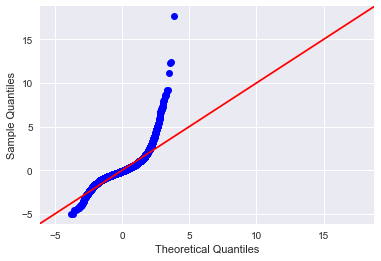

In [82]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [83]:
# Without removing much outliers this looks like a hot mess

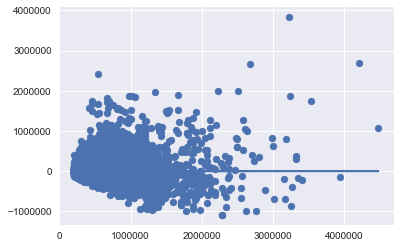

In [84]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# There seems to be some grouping in a cone shape but it can be clean up 
# significantly to be more accurate

## INTERPRET